In [2]:
print("hello world")

hello world


In [3]:
%pip install tensorflow
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
import os
print("Current Directory" ,os.getcwd())
curr_dir = os.getcwd()
train_path = os.path.join(curr_dir,"datasets","Train")
#print(train_path) ---> getting the path for training
test_path = os.path.join(curr_dir,"datasets","Test")
#print(test_path)  ---> getting the path for testing
valid_path = os.path.join(curr_dir,"datasets","Valid")
#print(valid_path)  ---> getting the path for Validating

Current Directory d:\EDUNET\Potato-Leaf-Disease-Detection\Potato-leaf-disease-detection-Project


In [6]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels = "inferred",
    label_mode = "categorical",
    color_mode = "rgb",
    image_size = (128,128),
    shuffle = True,
    interpolation = "bilinear"
)

Found 900 files belonging to 3 classes.


In [7]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode = "categorical",
    color_mode = "rgb",
    image_size = (128,128),
    shuffle = True,
    interpolation = "bilinear"
)

Found 300 files belonging to 3 classes.


In [ ]:
cnn = tf.keras.models.Sequential()

#
# Use Input layer for the initial shape (addition part)
cnn.add(tf.keras.layers.Input(shape=(128, 128, 3)))  # Correct way to define input shape

#remove this input_shape (Addition)
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
#cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

#remove this input_shape (Addition)
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
#cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25)) #Dropout remove the unnecessary neuron

cnn.add(tf.keras.layers.Flatten())     #Flatten convert 3d into 1d
cnn.add(tf.keras.layers.Dense(units = 1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units = 3,activation='softmax'))


In [10]:
cnn.compile(optimizer = tf.keras.optimizers.Adam(
    learning_rate = 0.0001),loss ='categorical_crossentropy',metrics = ['accuracy'])

In [11]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,820,563 (29.83 MB)

 Trainable params: 7,820,563 (29.83 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.3562 - loss: 1.3646 - val_accuracy: 0.5600 - val_loss: 0.9186
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.5804 - loss: 0.8289 - val_accuracy: 0.7233 - val_loss: 0.5539
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.7230 - loss: 0.5838 - val_accuracy: 0.7700 - val_loss: 0.5202
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.7420 - loss: 0.5559 - val_accuracy: 0.7600 - val_loss: 0.5210
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.7995 - loss: 0.4750 - val_accuracy: 0.8667 - val_loss: 0.3473
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.8785 - loss: 0.3207 - val_accuracy: 0.8400 - val_loss: 0.3759
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.9223 - loss: 0.2115 - val_accuracy: 0.9267 - val_loss: 0.1766
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.9424 - loss: 0.1804 - val_accuracy: 0.9500 - val_loss:

In [13]:
train_loss , train_acc = cnn.evaluate(training_set)
print("Training Accuracy :" , train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 723ms/step - accuracy: 0.9289 - loss: 0.1873
Training Accuracy : 0.9333333373069763


In [14]:
val_loss , val_acc = cnn.evaluate(validation_set)
print("Validation Accuracy :" , val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 677ms/step - accuracy: 0.9066 - loss: 0.2495
Validation Accuracy : 0.9066666960716248


In [15]:
cnn.save('trained_plant_disease_model.keras')

In [16]:
training_history.history

{'accuracy': [0.38555556535720825,
  0.6311110854148865,
  0.746666669845581,
  0.7777777910232544,
  0.8500000238418579,
  0.8711110949516296,
  0.9344444274902344,
  0.9477777481079102,
  0.9611111283302307,
  0.9477777481079102],
 'loss': [1.1877413988113403,
  0.7429074048995972,
  0.5458831191062927,
  0.5110739469528198,
  0.3747713267803192,
  0.3057774603366852,
  0.18228890001773834,
  0.15677954256534576,
  0.1231585368514061,
  0.13887201249599457],
 'val_accuracy': [0.5600000023841858,
  0.7233333587646484,
  0.7699999809265137,
  0.7599999904632568,
  0.8666666746139526,
  0.8399999737739563,
  0.9266666769981384,
  0.949999988079071,
  0.9633333086967468,
  0.9066666960716248],
 'val_loss': [0.9185687303543091,
  0.5539386868476868,
  0.5201700925827026,
  0.5209500193595886,
  0.3473148047924042,
  0.37586307525634766,
  0.17664696276187897,
  0.14495247602462769,
  0.1176486611366272,
  0.24811482429504395]}

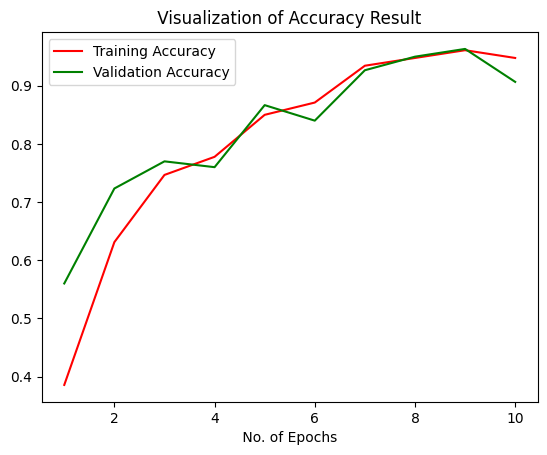

In [17]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color = 'red',label = 'Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color = 'green',label = 'Validation Accuracy')
plt.xlabel(" No. of Epochs ")
plt.title(" Visualization of Accuracy Result ")
plt.legend()
plt.show()